In [1]:
import pandas as pd

In [48]:
df = pd.read_csv(r"C:\Projects\ml_experiments\Datasets\filtered_thyroid_data.csv")

In [49]:
df

,Age,Gender,Hx Radiothreapy,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,Yes,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,No,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


In [50]:
for i in df.columns:
    print(df[i].value_counts())

Age
31    22
27    13
30    12
33    12
40    12
      ..
79     1
15     1
82     1
64     1
78     1
Name: count, Length: 65, dtype: int64
Gender
F    312
M     71
Name: count, dtype: int64
Hx Radiothreapy
No     376
Yes      7
Name: count, dtype: int64
Adenopathy
No           277
Right         48
Bilateral     32
Left          17
Extensive      7
Posterior      2
Name: count, dtype: int64
Pathology
Papillary         287
Micropapillary     48
Follicular         28
Hurthel cell       20
Name: count, dtype: int64
Focality
Uni-Focal      247
Multi-Focal    136
Name: count, dtype: int64
Risk
Low             249
Intermediate    102
High             32
Name: count, dtype: int64
T
T2     151
T3a     96
T1a     49
T1b     43
T4a     20
T3b     16
T4b      8
Name: count, dtype: int64
N
N0     268
N1b     93
N1a     22
Name: count, dtype: int64
M
M0    365
M1     18
Name: count, dtype: int64
Stage
I      333
II      32
IVB     11
III      4
IVA      3
Name: count, dtype: int64
Response
Excelle

<Axes: xlabel='Response', ylabel='count'>

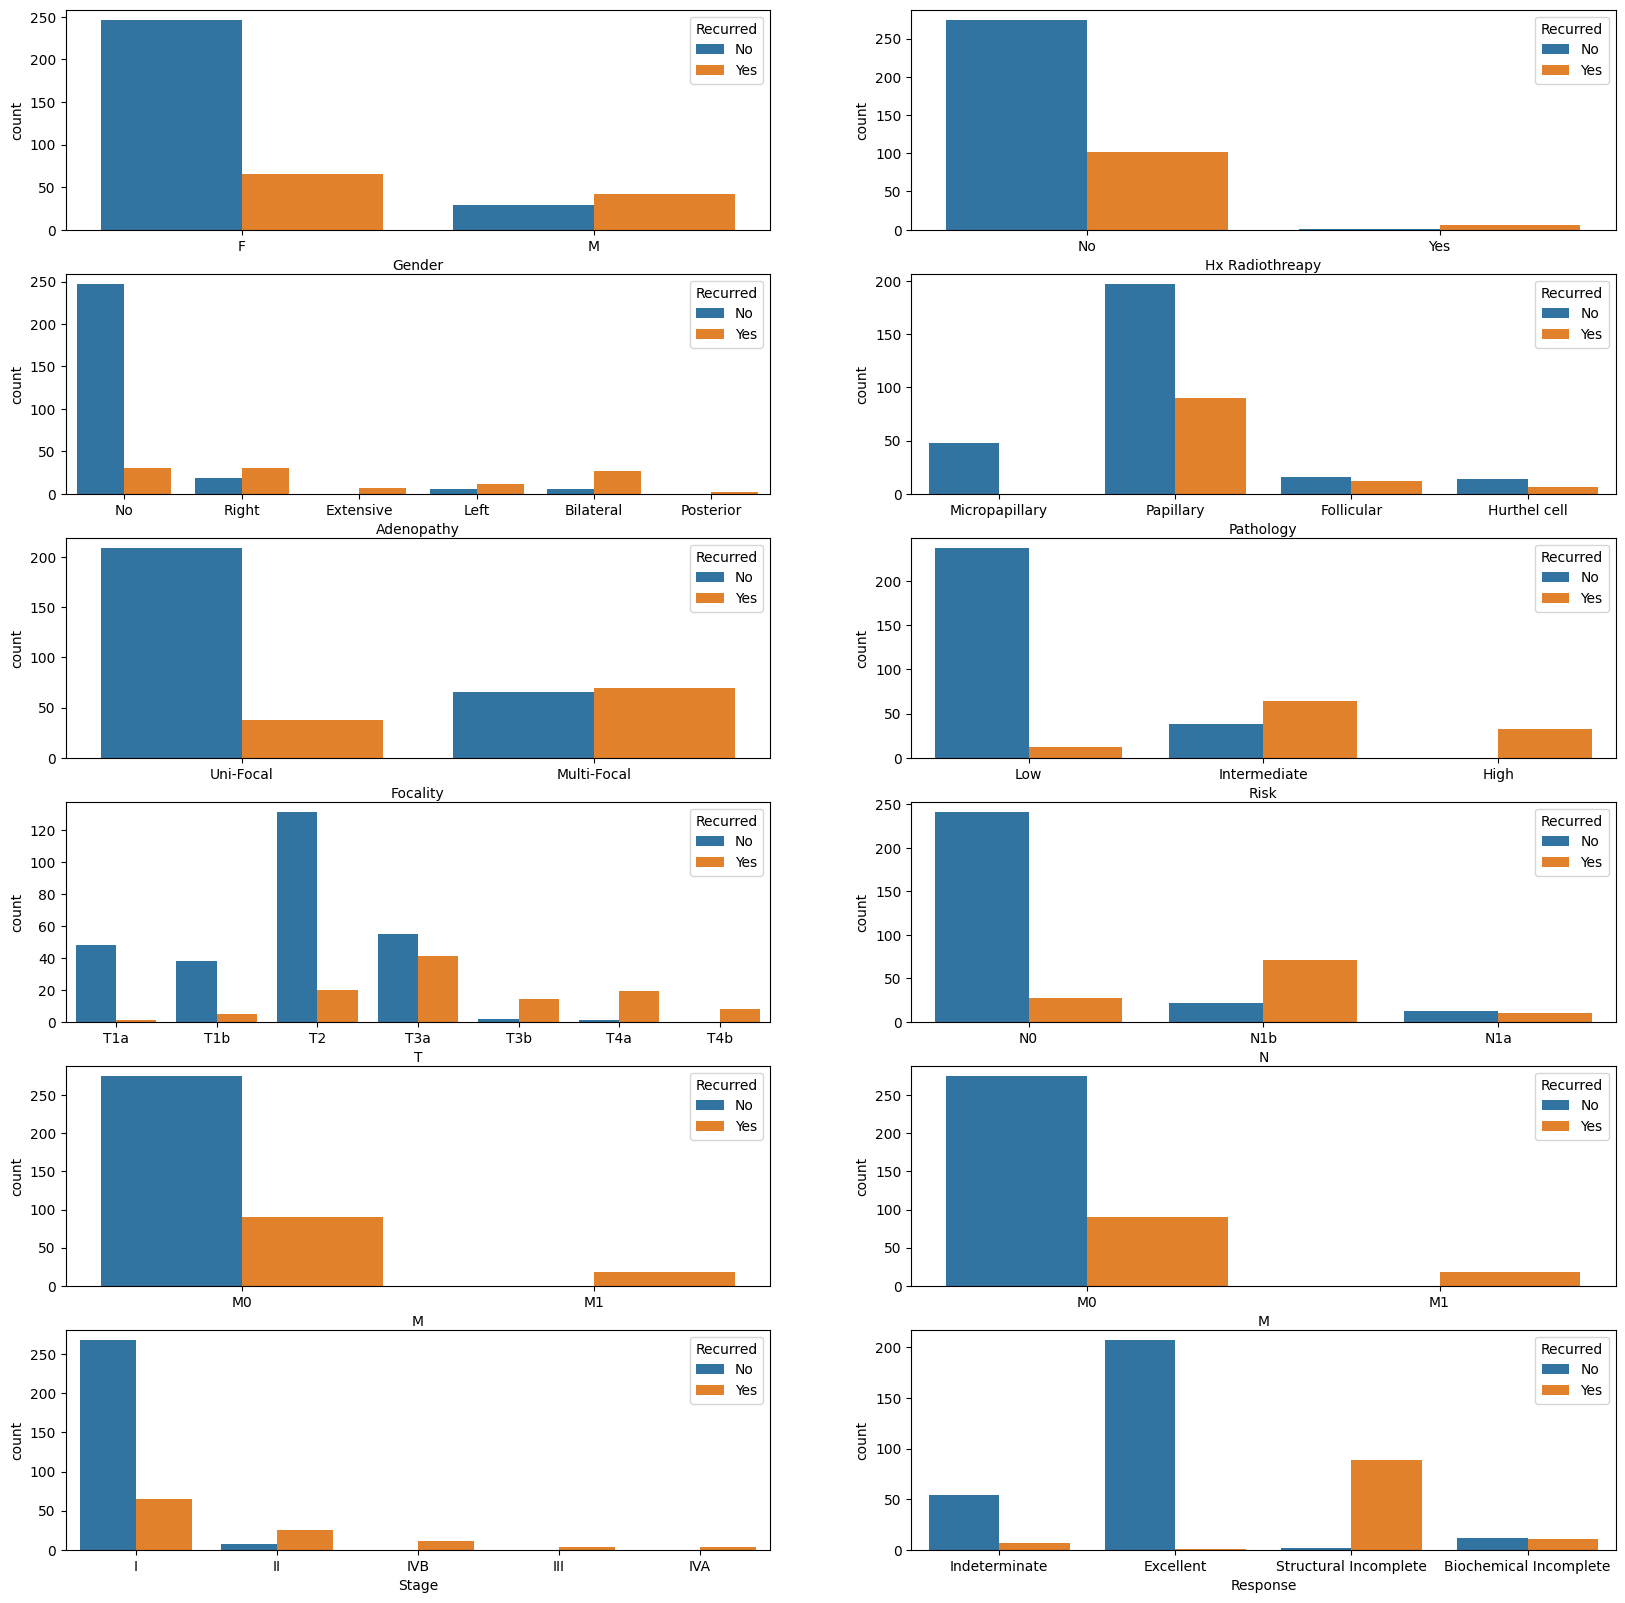

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(6,2,figsize=(20,20))


sns.countplot(x = 'Gender', data = df, hue = 'Recurred',ax=ax[0,0])
sns.countplot(x = 'Hx Radiothreapy', data = df, hue = 'Recurred',ax=ax[0,1])
sns.countplot(x = 'Adenopathy', data = df, hue = 'Recurred',ax=ax[1,0])
sns.countplot(x = 'Pathology', data = df, hue = 'Recurred',ax=ax[1,1])
sns.countplot(x = 'Focality', data = df, hue = 'Recurred',ax=ax[2,0])
sns.countplot(x = 'Risk', data = df, hue = 'Recurred',ax=ax[2,1])
sns.countplot(x = 'T', data = df, hue = 'Recurred',ax=ax[3,0])
sns.countplot(x = 'N', data = df, hue = 'Recurred',ax=ax[3,1])
sns.countplot(x = 'M', data = df, hue = 'Recurred',ax=ax[4,0])
sns.countplot(x = 'M', data = df, hue = 'Recurred',ax=ax[4,1])
sns.countplot(x = 'Stage', data = df, hue = 'Recurred',ax=ax[5,0])
sns.countplot(x = 'Response', data = df, hue = 'Recurred',ax=ax[5,1])


In [52]:
# data = {'Category': ['A', 'A', 'B', 'B', 'A', 'B'],
#         'Subcategory': ['X', 'Y', 'X', 'Y', 'X', 'Y'],
#         'Sales': [10, 20, 15, 25, 12, 18]}
# df = pd.DataFrame(data)

# grouped_df = df.groupby(['Category', 'Subcategory']).size().reset_index(name='count')
# total_counts = grouped_df.groupby('Category')['count'].transform('sum')
# print(grouped_df)
# print(total_counts)
# grouped_df['percentage'] = (grouped_df['count'] / total_counts) * 100
# print(grouped_df)

In [56]:
df['Gender'].value_counts()

Gender
F    312
M     71
Name: count, dtype: int64

In [74]:
for column in df.columns:
    # print(column)
    if column != "Age" and column != "Recurred":
        grouped_df = df.groupby(['Recurred',column]).size().reset_index(name='count')
        total_counts = grouped_df.groupby(column)['count'].transform('sum')
        grouped_df['percentage'] = (grouped_df['count'] / total_counts) * 100
        # print(grouped_df)
        ndf = grouped_df[grouped_df['Recurred'] == "Yes"]
        # print(grouped_df[grouped_df['Recurred'] == "Yes"])
        for i in range(len(ndf)): 
            print(column," colum with category ",ndf.iloc[i][column]," having percentage of recurrence ",ndf.iloc[i]['percentage']," count ",ndf.iloc[i]['count'])

Gender  colum with category  F  having percentage of recurrence  21.153846153846153  count  66
Gender  colum with category  M  having percentage of recurrence  59.154929577464785  count  42
Hx Radiothreapy  colum with category  No  having percentage of recurrence  27.127659574468083  count  102
Hx Radiothreapy  colum with category  Yes  having percentage of recurrence  85.71428571428571  count  6
Adenopathy  colum with category  Bilateral  having percentage of recurrence  84.375  count  27
Adenopathy  colum with category  Extensive  having percentage of recurrence  100.0  count  7
Adenopathy  colum with category  Left  having percentage of recurrence  70.58823529411765  count  12
Adenopathy  colum with category  No  having percentage of recurrence  10.830324909747292  count  30
Adenopathy  colum with category  Posterior  having percentage of recurrence  100.0  count  2
Adenopathy  colum with category  Right  having percentage of recurrence  62.5  count  30
Pathology  colum with categor

<Axes: xlabel='Age'>

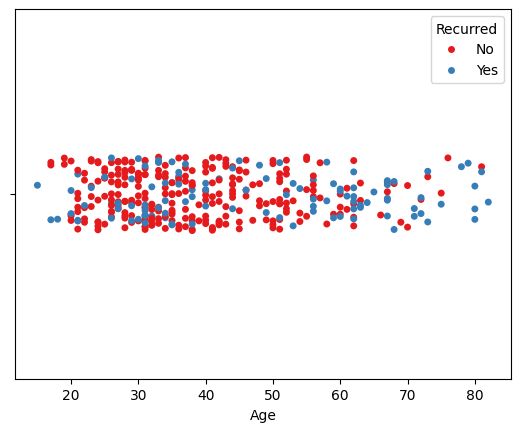

In [78]:
sns.stripplot(data=df, x='Age', hue='Recurred', palette='Set1')


In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
X = df[['Age']]
y = df['Recurred']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]  # Get probability scores

# Evaluate Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7922077922077922

Classification Report:
               precision    recall  f1-score   support

          No       0.79      0.98      0.88        58
         Yes       0.80      0.21      0.33        19

    accuracy                           0.79        77
   macro avg       0.80      0.60      0.61        77
weighted avg       0.79      0.79      0.74        77



c:\Users\vishwas.balkundi\miniforge3\envs\env_ml\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


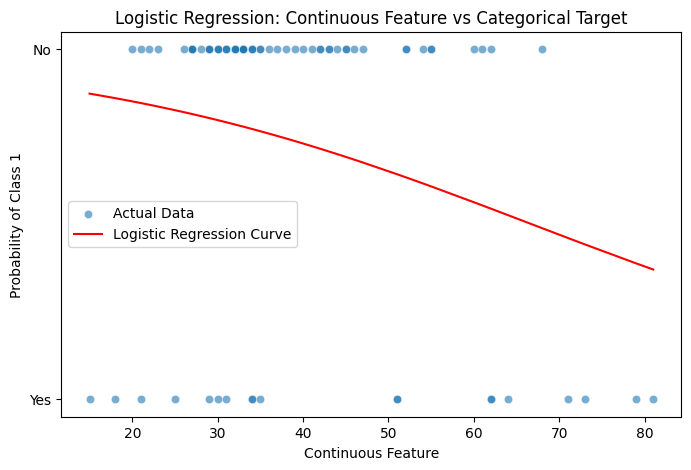

In [81]:
import numpy as np
X_sorted = np.sort(X_test.values.flatten())
y_proba_sorted = log_reg.predict_proba(X_sorted.reshape(-1, 1))[:, 1]

plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_test.values.flatten(), y=y_test, label="Actual Data", alpha=0.6)
plt.plot(X_sorted, y_proba_sorted, color="red", label="Logistic Regression Curve")
plt.xlabel("Continuous Feature")
plt.ylabel("Probability of Class 1")
plt.title("Logistic Regression: Continuous Feature vs Categorical Target")
plt.legend()
plt.show()

In [82]:
df

,Age,Gender,Hx Radiothreapy,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,Yes,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,No,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


In [84]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
exclude_cols = ['Age']  # Add columns you don't want to encode

# Apply Label Encoding only to categorical columns except excluded ones
label_encoders = {}  # Store encoders for inverse transformation later
for col in df.columns:
    if col not in exclude_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le 

In [85]:
df

,Age,Gender,Hx Radiothreapy,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,0,0,3,2,1,2,0,0,0,0,2,0
1,34,0,0,3,2,1,2,0,0,0,0,1,0
2,30,0,0,3,2,1,2,0,0,0,0,1,0
3,62,0,0,3,2,1,2,0,0,0,0,1,0
4,62,0,0,3,2,0,2,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,1,1,5,3,1,0,6,2,1,4,0,1
379,81,1,1,1,3,0,0,6,2,1,4,3,1
380,72,1,0,0,3,0,0,6,2,1,4,3,1
381,61,1,1,1,1,0,0,6,2,0,3,3,1


In [86]:
df['Recurred'].value_counts()

Recurred
0    275
1    108
Name: count, dtype: int64

In [87]:
x=df.drop(["Recurred"],axis=1)
y=df["Recurred"]

In [90]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority') 
x,y=smote.fit_resample(x,y)
y.value_counts()

Recurred
0    275
1    275
Name: count, dtype: int64

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [100]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
#train accuracy
dt.score(X_train,y_train)

1.0

In [101]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
dt_pred = dt.predict(X_test)
print('Decision Tree Regressor RMSE:',np.sqrt(mean_squared_error(y_test,dt_pred)))
print('Decision Tree Regressor Accuracy:',dt.score(X_test,y_test))
print('Decision Tree Regressor MAE:',mean_absolute_error(y_test,dt_pred))

Decision Tree Regressor RMSE: 0.28603877677367767
Decision Tree Regressor Accuracy: 0.6709870388833499
Decision Tree Regressor MAE: 0.08181818181818182


In [104]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=20, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.96

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        59
           1       0.93      1.00      0.96        51

    accuracy                           0.96       110
   macro avg       0.96      0.97      0.96       110
weighted avg       0.97      0.96      0.96       110



In [106]:
y_test.value_counts()

Recurred
0    59
1    51
Name: count, dtype: int64

In [ ]:
# data = {'Category': ['A', 'A', 'B', 'B', 'A', 'B'],
#         'Subcategory': ['X', 'Y', 'X', 'Y', 'X', 'Y'],
#         'Sales': [10, 20, 15, 25, 12, 18]}
# df = pd.DataFrame(data)

# grouped_df = df.groupby(['Category', 'Subcategory']).size().reset_index(name='count')
# total_counts = grouped_df.groupby('Category')['count'].transform('sum')
# print(grouped_df)
# print(total_counts)
# grouped_df['percentage'] = (grouped_df['count'] / total_counts) * 100
# print(grouped_df)

In [ ]:
# data = {'Category': ['A', 'A', 'B', 'B', 'A', 'B'],
#         'Subcategory': ['X', 'Y', 'X', 'Y', 'X', 'Y'],
#         'Sales': [10, 20, 15, 25, 12, 18]}
# df = pd.DataFrame(data)

# grouped_df = df.groupby(['Category', 'Subcategory']).size().reset_index(name='count')
# total_counts = grouped_df.groupby('Category')['count'].transform('sum')
# print(grouped_df)
# print(total_counts)
# grouped_df['percentage'] = (grouped_df['count'] / total_counts) * 100
# print(grouped_df)

In [65]:
len(df)

383

In [54]:
total_counts = grouped_df.groupby("Category")['count'].transform('sum')
print(total_counts)

KeyError: 'Category'